In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import geopandas
import numpy as np
import os
import moviepy.video.io.ImageSequenceClip
from moviepy.editor import AudioFileClip

# abandoned because I can't get shapefile until I go into the office

data_dir = "../Data/"
# Load the data from https://www.kaggle.com/datasets/awadhi123/indian-election-dataset
india_state_level_election_df = pd.read_csv(data_dir + "indian-state-level-election.csv")


In [35]:
# clean party abbreviations keeping only the first 3 characters
india_state_level_election_df['partyabbre'] = india_state_level_election_df['partyabbre'].str[:3]

# Look at the data
print(india_state_level_election_df.head())



           st_name    year  ac_no        ac_name ac_type  \
4   Andhra Pradesh  1978.0      1      Ichapuram     GEN   
7   Andhra Pradesh  1978.0      2        Sompeta     GEN   
10  Andhra Pradesh  1978.0      3        Tekkali     GEN   
13  Andhra Pradesh  1978.0      4  Harishchandra     GEN   
17  Andhra Pradesh  1978.0      5  Narasannapeta     GEN   

                            cand_name cand_sex                     partyname  \
4           Bendalam Venkatesam Sarma        M                  Janata Party   
7                    Gouthu Latchanna        M                  Janata Party   
10             Bammaidi Narayanaswami        M                  Janata Party   
13  Appalanarasimha Bugata Kennapalli        M      Indian National Congress   
17                   Dola Seetaramulu        M  Indian National Congress (I)   

   partyabbre  totvotpoll  electors  percent_votes  part_won_bool  \
4         JNP     34251.0     83247      41.143825           True   
7         JNP     42

In [37]:
# calculate the percentage of votes for each party by year, and constituency
india_state_level_election_df['percent_votes'] = india_state_level_election_df['totvotpoll'] / india_state_level_election_df['electors'] * 100

# calculate the winner by year and constituency
india_state_level_election_df['party_won_bool'] = india_state_level_election_df.groupby(['year', 'ac_name'])['percent_votes'].transform(max) == india_state_level_election_df['percent_votes']

# calculate voter turnout by year and constituency
india_state_level_election_df['voter_turnout'] = india_state_level_election_df.groupby(['year', 'ac_name'])['percent_votes'].transform(sum)

# subset data by who won
india_state_level_election_df = india_state_level_election_df[india_state_level_election_df['party_won_bool']]



In [44]:
# statistics
# number of different winning parties by year
print(india_state_level_election_df.groupby('year')['partyabbre'].nunique())
print(max(india_state_level_election_df.groupby('year')['partyabbre'].nunique()))


year
1977.0    24
1978.0    10
1979.0     7
1980.0    21
1982.0    17
1983.0    12
1984.0    12
1985.0    15
1987.0    14
1989.0    20
1990.0    14
1991.0    28
1992.0    10
1993.0    14
1994.0    18
1995.0    16
1996.0    30
1997.0     6
1998.0    16
1999.0    12
2000.0    19
2001.0    25
2002.0    19
2003.0    20
2004.0    27
2005.0    17
2005.1    12
2006.0    31
2007.0    23
2008.0    26
2009.0    39
2010.0     8
2011.0    28
2012.0    22
2013.0    25
2014.0    37
2015.0     2
Name: partyabbre, dtype: int64
39


KeyError: 'pct_votes'

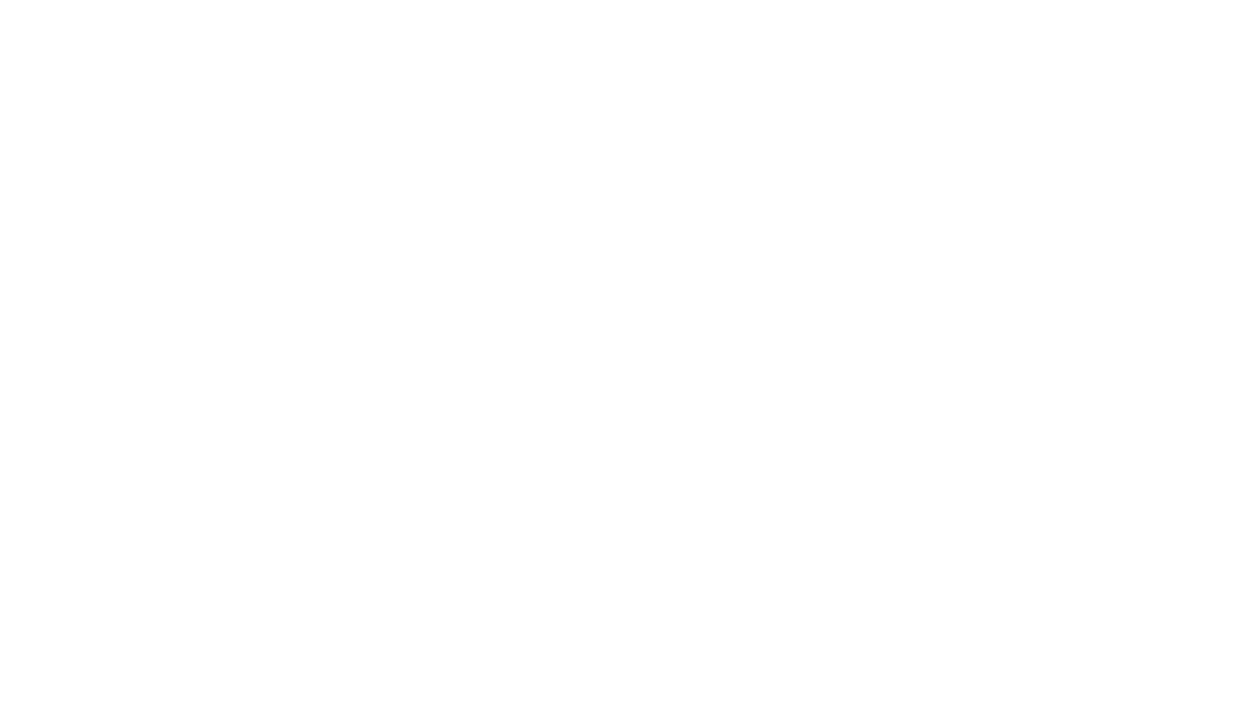